In [23]:
import numpy as np
import scipy as sp
import statsmodels as st

import matplotlib.pyplot as plt

# Hypothesis

## Data

In [2]:
data = np.loadtxt('https://github.com/aloctavodia/BAP/raw/refs/heads/master/code/data/chemical_shifts.csv')
data[:10]

array([51.06, 55.12, 53.73, 50.24, 52.05, 56.4 , 48.45, 52.34, 55.65,
       51.49])

In [12]:
data_2 = data*1.5 - 25
data_2

array([51.59 , 57.68 , 55.595, 50.36 , 53.075, 59.6  , 47.675, 53.51 ,
       58.475, 52.235, 52.79 , 70.145, 54.5  , 59.135, 52.895, 53.465,
       53.495, 61.22 , 61.16 , 57.71 , 55.895, 56.93 , 59.135, 77.87 ,
       52.04 , 58.205, 51.095, 52.91 , 57.425, 50.585, 54.365, 52.25 ,
       54.02 , 46.58 , 49.595, 52.73 , 57.485, 54.26 , 54.785, 56.78 ,
       52.19 , 55.595, 52.415, 49.715, 53.63 , 56.45 , 55.76 , 54.74 ])

## Helpers

In [3]:
h0_or_h1 = lambda pvalue: 'HA' if pvalue < 0.05 else 'H0'

## Normality. Shapiro-Wilk Test

In [10]:
result = sp.stats.shapiro(data)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

ShapiroResult(statistic=0.8256072402000427, pvalue=5.199869974603644e-06)
Result: HA


## Student's T-test. ONE group of scores

In [12]:
result = sp.stats.ttest_1samp(data, popmean=0.5)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

Ttest_1sampResult(statistic=106.23530250014758, pvalue=1.2069687179735237e-57)
Result: HA


In [15]:
result = sp.stats.ttest_1samp(data, popmean=data.mean()-1)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

Ttest_1sampResult(statistic=2.0045736232401867, pvalue=0.05078876575447046)
Result: H0


## Student's T-test. TWO independent samples of scores

In [24]:
rvs = sp.stats.norm.rvs(loc=0, scale=10, size=50)
result = sp.stats.ttest_ind(data, rvs)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

Ttest_indResult(statistic=35.112444863717755, pvalue=1.4036363550261703e-56)
Result: HA


## Median

### Mann-Whitney. Independent data-sets

In [16]:
rvs = sp.stats.norm.rvs(loc=0, scale=1, size=50)
result = sp.stats.mannwhitneyu(data, rvs)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

MannwhitneyuResult(statistic=0.0, pvalue=7.671599742405718e-18)
Result: HA


### Wilcoxon. Related data-sets

In [14]:
result = sp.stats.mannwhitneyu(data, data_2)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

MannwhitneyuResult(statistic=850.5, pvalue=0.01370411888489348)
Result: HA


### Mood's Median Test

In [15]:
rvs = sp.stats.norm.rvs(loc=0, scale=1, size=50)
result = sp.stats.median_test(data, data_2, rvs)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

(78.08333333333333, 1.1076934875089666e-17, 51.894999999999996, array([[33, 40,  0],
       [15,  8, 50]], dtype=int64))
Result: HA


## Variance

In [16]:
result = sp.stats.fligner(data, data_2)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

FlignerResult(statistic=4.419575689770522, pvalue=0.03552887018892202)
Result: HA


## Proportion. Chi-square test

In [17]:
result = sp.stats.chisquare(data, data_2)

print(result)
print(f'Result: {h0_or_h1(result[1])}')

Power_divergenceResult(statistic=4.4613344984688315, pvalue=0.9999999999999999)
Result: H0


## Correlation

### Pearson for normal data

In [41]:
rvs_1 = sp.stats.norm.rvs(loc=0, scale=1, size=50)
rvs_2 = sp.stats.norm.rvs(loc=-1, scale=2, size=50)
result = sp.stats.pearsonr(rvs_1, rvs_2)

print(result)

(0.10682237624256236, 0.4602957584740069)


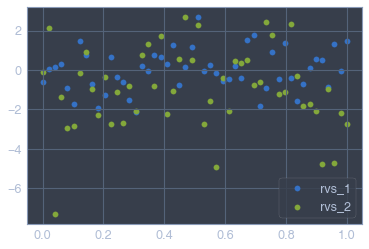

In [42]:
plt.scatter(np.linspace(0, 1, len(rvs_1)), rvs_1, label='rvs_1')
plt.scatter(np.linspace(0, 1, len(rvs_1)), rvs_2, label='rvs_2')
plt.legend()

### Kendall’s tau for ordinal data

In [18]:
result = sp.stats.kendalltau(np.vectorize(int)(data), np.vectorize(int)(data_2))

print(result)

KendalltauResult(correlation=0.96994788905227, pvalue=2.149611161436706e-19)


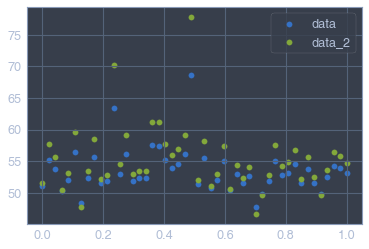

In [39]:
plt.scatter(np.linspace(0, 1, len(data)), data, label='data')
plt.scatter(np.linspace(0, 1, len(data)), data_2, label='data_2')
plt.legend()

### Spearman

In [36]:
rvs_1 = sp.stats.norm.rvs(loc=data.mean(), scale=data.std(), size=len(data))
result = sp.stats.spearmanr(data, rvs_1)

print(result)

SpearmanrResult(correlation=-0.19090267628405236, pvalue=0.19369010753519458)


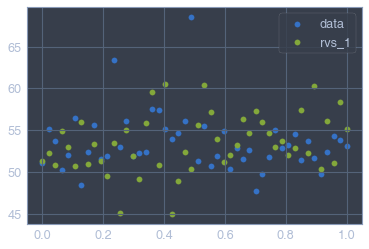

In [38]:
plt.scatter(np.linspace(0, 1, len(data)), data, label='data')
plt.scatter(np.linspace(0, 1, len(data)), rvs_1, label='rvs_1')
plt.legend()